# GCM Filters Basic Case Exploration

In [16]:
import gcm_filters
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xrft

### Create an array of random numbers that are in (0,1)

In [17]:
ny, nx = (128, 256)
nt = 10
data = np.random.rand(nt, ny, nx)
da = xr.DataArray(data, dims=['time', 'y', 'x'])
da

<xarray.DataArray (time: 10, y: 128, x: 256)>
array([[[0.69380554, 0.61886728, 0.23194946, ..., 0.51911172,
         0.16083819, 0.8958429 ],
        [0.9539929 , 0.12211667, 0.82268531, ..., 0.26171206,
         0.57013352, 0.80283618],
        [0.45288732, 0.00377653, 0.3294884 , ..., 0.12763317,
         0.00669367, 0.87226743],
        ...,
        [0.05761788, 0.55469754, 0.65211335, ..., 0.38663899,
         0.13122773, 0.8422727 ],
        [0.85791557, 0.37737186, 0.79223221, ..., 0.10386174,
         0.53754242, 0.08611659],
        [0.25505217, 0.1512719 , 0.01578498, ..., 0.28319315,
         0.47101761, 0.49309413]],

       [[0.69758196, 0.56781181, 0.51088886, ..., 0.71331379,
         0.27817136, 0.21821631],
        [0.38551872, 0.70296861, 0.5100773 , ..., 0.42274287,
         0.38688125, 0.51729163],
        [0.98744199, 0.20495516, 0.45035846, ..., 0.20539824,
         0.65690281, 0.47966126],
...
        [0.86860281, 0.26131094, 0.76995369, ..., 0.12647212,
         0.92385367, 0.90055343],
        [0.66158964, 0.01419314, 0.62191233, ..., 0.4077638 ,
         0.82548811, 0.54881215],
        [0.39887524, 0.63839117, 0.70746042, ..., 0.64203815,
         0.70409511, 0.71477369]],

       [[0.72062623, 0.37002058, 0.94665002, ..., 0.29956277,
         0.26294387, 0.16523617],
        [0.03895758, 0.71480353, 0.65141458, ..., 0.61219169,
         0.59971194, 0.49533743],
        [0.30501661, 0.04843795, 0.74429838, ..., 0.81341803,
         0.10669601, 0.15237244],
        ...,
        [0.73403812, 0.8448778 , 0.72964534, ..., 0.55166341,
         0.49251079, 0.08872357],
        [0.89814616, 0.15471251, 0.60449535, ..., 0.12165331,
         0.28182309, 0.82048898],
        [0.1274411 , 0.43108051, 0.49492287, ..., 0.00908547,
         0.58683654, 0.87591204]]])
Dimensions without coordinates: time, y, x

### Plot unfiltered data

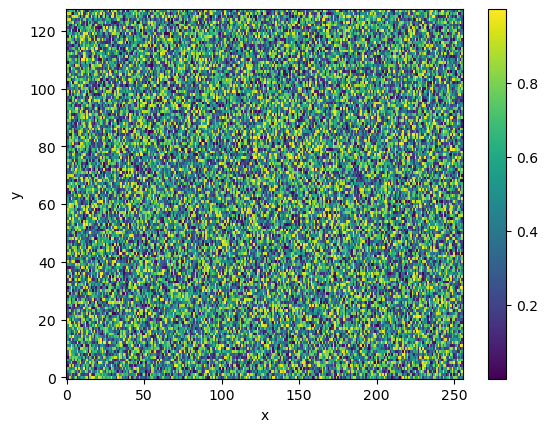

In [4]:
da.isel(time=0).plot()

### Create filter

In [18]:
filter = gcm_filters.Filter(
    filter_scale=4,
    dx_min=1,
    filter_shape=gcm_filters.FilterShape.TAPER,
    grid_type=gcm_filters.GridType.REGULAR
)
    
filter

Filter(filter_scale=4, dx_min=1, filter_shape=<FilterShape.TAPER: 2>, transition_width=3.141592653589793, ndim=2, n_steps=16, grid_type=<GridType.REGULAR: 1>)

### Apply filter

In [19]:
da_filtered = filter.apply(da, dims=['y', 'x'])
da_filtered

<xarray.DataArray (time: 10, y: 128, x: 256)>
array([[[0.48209556, 0.40970168, 0.34741612, ..., 0.45327284,
         0.46426927, 0.49605265],
        [0.46975015, 0.39152093, 0.32819554, ..., 0.48777359,
         0.48302868, 0.49671718],
        [0.44289485, 0.37239913, 0.32109271, ..., 0.51805071,
         0.48775107, 0.4779454 ],
        ...,
        [0.49234028, 0.49073799, 0.45998619, ..., 0.4062075 ,
         0.40766705, 0.45175306],
        [0.46646088, 0.43989989, 0.40351578, ..., 0.39516464,
         0.40302537, 0.44516173],
        [0.47027738, 0.41742801, 0.3681801 , ..., 0.41537238,
         0.42813776, 0.46784422]],

       [[0.48382702, 0.50052586, 0.49297837, ..., 0.51251431,
         0.47001289, 0.46374514],
        [0.51882909, 0.50329989, 0.46442427, ..., 0.53471206,
         0.51097664, 0.51251381],
        [0.527624  , 0.47779565, 0.40554612, ..., 0.5365429 ,
         0.52901728, 0.53616094],
...
        [0.63672906, 0.53563436, 0.44702121, ..., 0.67035148,
         0.72315984, 0.71114651],
        [0.58243809, 0.51489994, 0.45392734, ..., 0.57702075,
         0.62478912, 0.627744  ],
        [0.52970867, 0.49747579, 0.45611317, ..., 0.47884331,
         0.51948034, 0.54046947]],

       [[0.46133928, 0.49836656, 0.51908455, ..., 0.35474226,
         0.38934981, 0.42380805],
        [0.4207975 , 0.45126345, 0.48901556, ..., 0.43083962,
         0.43613262, 0.42168034],
        [0.41342338, 0.40639721, 0.43507573, ..., 0.53829259,
         0.53020852, 0.46983457],
        ...,
        [0.48255742, 0.47577355, 0.43601507, ..., 0.38309162,
         0.40496238, 0.44955804],
        [0.50113538, 0.49437388, 0.45370839, ..., 0.34560151,
         0.39655678, 0.4605871 ],
        [0.49730879, 0.51380945, 0.50068999, ..., 0.3281255 ,
         0.38467805, 0.44865878]]])
Dimensions without coordinates: time, y, x

### Plot filtered data

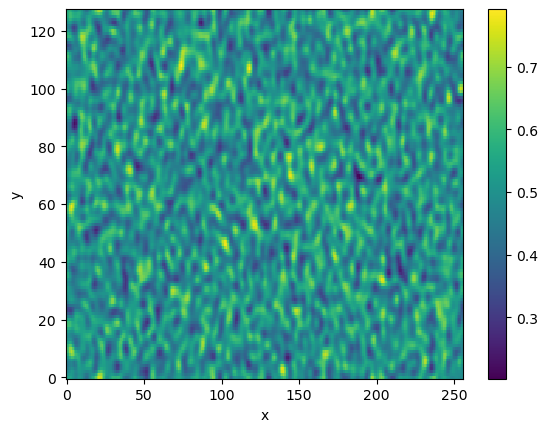

In [15]:
da_filtered.isel(time=0).plot()

### Plot the power spectra for the filtered and unfiltered case

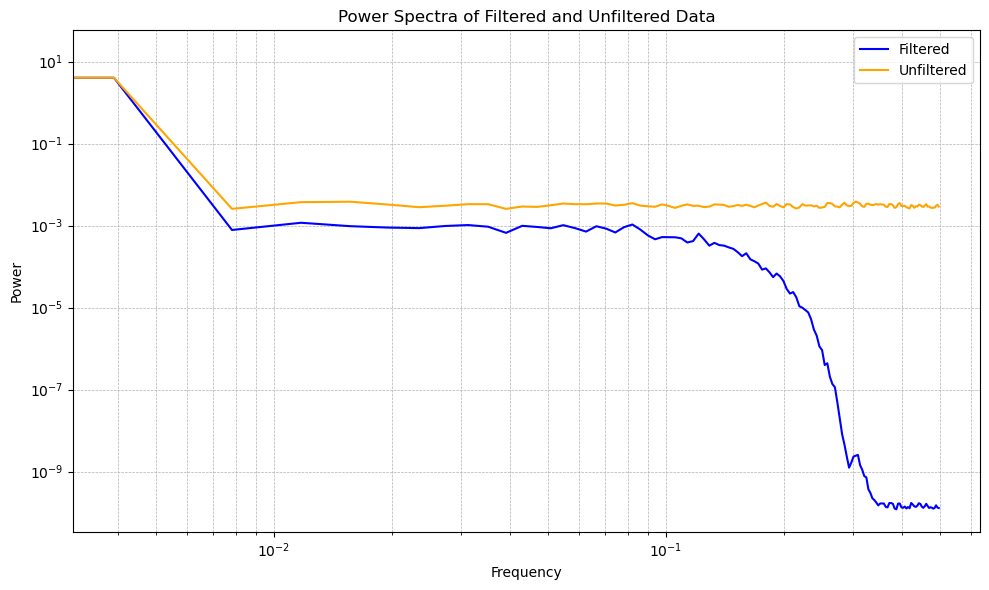

In [20]:
da_filtered_mean = da_filtered.mean(dim='time')
da_mean = da.mean(dim='time')

# Compute power spectrum for mean prediction and target
ps_filtered = xrft.power_spectrum(da_filtered_mean, dim='x', window=True).mean(dim='y')
ps_unfiltered = xrft.power_spectrum(da_mean, dim='x', window=True).mean(dim='y')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_x, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_x, ps_unfiltered, label='Unfiltered', color='orange')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


### Find wavenumber cutoff for filter

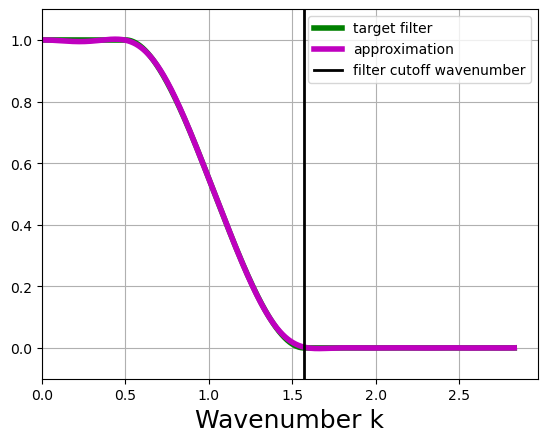

In [30]:
filter.plot_shape()

We can try to convert from frequency to wavenumber as such: $f = \frac{k}{2\pi}$.

### Power spectra for wavenumber k

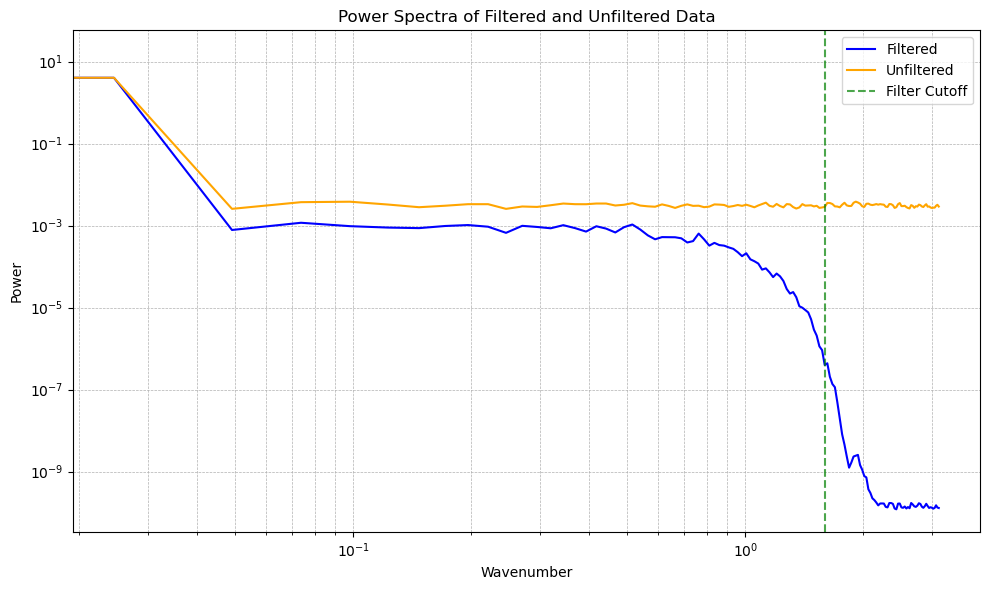

In [21]:
da_filtered_mean = da_filtered.mean(dim='time')
da_mean = da.mean(dim='time')

# Compute power spectrum for mean prediction and target
ps_filtered = xrft.power_spectrum(da_filtered_mean, dim='x', window=True).mean(dim='y')
ps_unfiltered = xrft.power_spectrum(da_mean, dim='x', window=True).mean(dim='y')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_x * 2 * np.pi, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_x * 2 * np.pi, ps_unfiltered, label='Unfiltered', color='orange')

plt.axvline(1.6, color='green', linestyle='--', alpha=0.7, label=f"Filter Cutoff")

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavenumber')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


Note that our filter cutoff line does not seem to correspond to where the filtered power spectra drops off. This indicates that our frequency-wavenumber relation $f = \frac{k}{2\pi}$ is likely incorrect. 

However, we still see that the expected power spectra dropoff for the filtered case is occuring. We just need to change our frequency to wavenumber conversion.

# CM2.6 Data Exploration

### Pre-process data

In [22]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import warnings
from xgcm import Grid
import importlib
import preprocessing
import gcm_filters
import xrft

warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data
from gcm_filtering_modified import filter_inputs_dataset
from gcm_filtering_modified import filter_inputs

In [2]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    dxt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_t        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [3]:
ds_in = ds_merged
ds_in = ds_in.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
ds_in

<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

### Filter data and create filter

In [5]:
print("Filtering model")
ds_out_50, filter_cm26 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50

Filtering model


<xarray.Dataset>
Dimensions:       (time: 7305, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    filter_scale:    50
    filter_type:     gaussian
    applied_filter:  Filter(filter_scale=50, dx_min=1, filter_shape=<FilterSh...

### Power spectra plotted against frequency

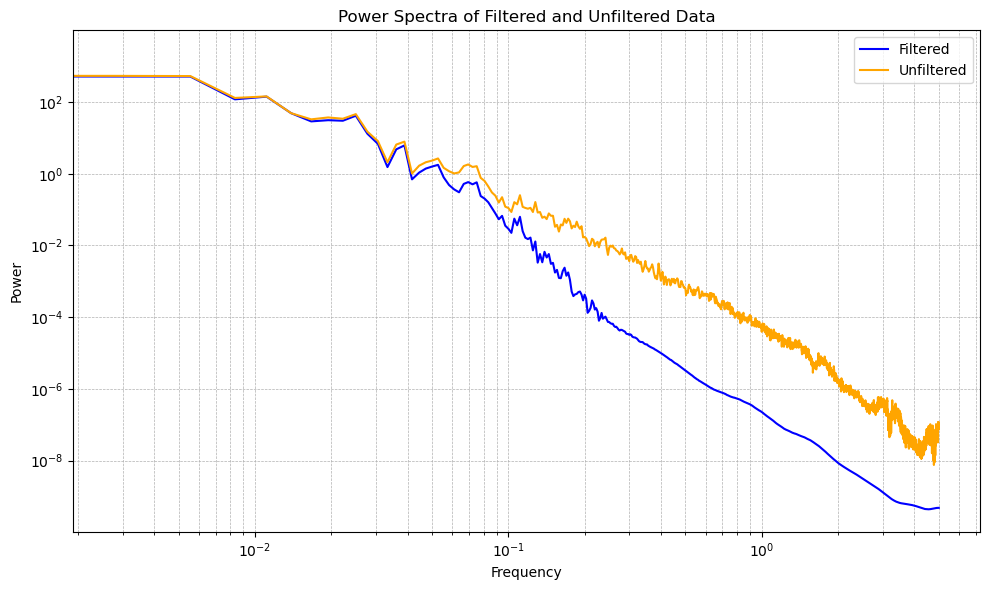

In [12]:
ds_in_snapshot = ds_in["u_relative"][0] #choose first time point
ds_out_50_snapshot = ds_out_50["u_relative"][0] #choose first time point

# Compute power spectrum for mean prediction and target
ps_unfiltered = xrft.power_spectrum(ds_in_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps_filtered = xrft.power_spectrum(ds_out_50_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')

# Plot power spectra
plt.figure(figsize=(10, 6))
plt.plot(ps_filtered.freq_xt_ocean, ps_filtered, label='Filtered', color='blue')
plt.plot(ps_unfiltered.freq_xt_ocean, ps_unfiltered, label='Unfiltered', color='orange')

# Configure the plot
plt.title("Power Spectra of Filtered and Unfiltered Data")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc='best')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


### Plot filter cutoff

In [6]:
filter_cm26

Filter(filter_scale=50, dx_min=1, filter_shape=<FilterShape.GAUSSIAN: 1>, transition_width=3.141592653589793, ndim=2, n_steps=56, grid_type=<GridType.REGULAR_WITH_LAND: 3>)

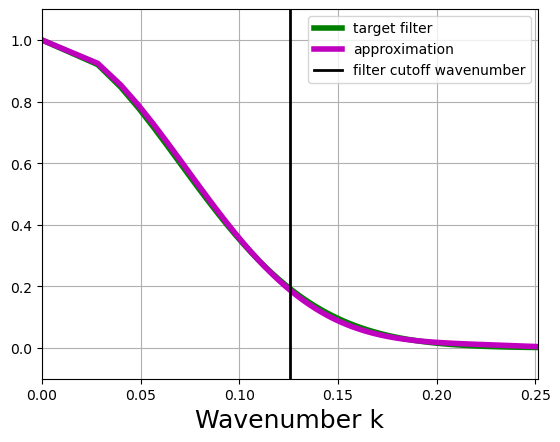

In [7]:
filter_cm26.plot_shape()

### Calculate frequency cutoff -- deep water waves

We can relate frequency and wavenumber for deep water waves as such: $(2\pi f)^2 = gk$, or $\omega^2=gk$, where $\omega=2\pi f$. Let's plot the power spectra against wavenumber. Let's also plot the cutoff wavenumber on this graph.

### Power spectra plotted against wavenumber

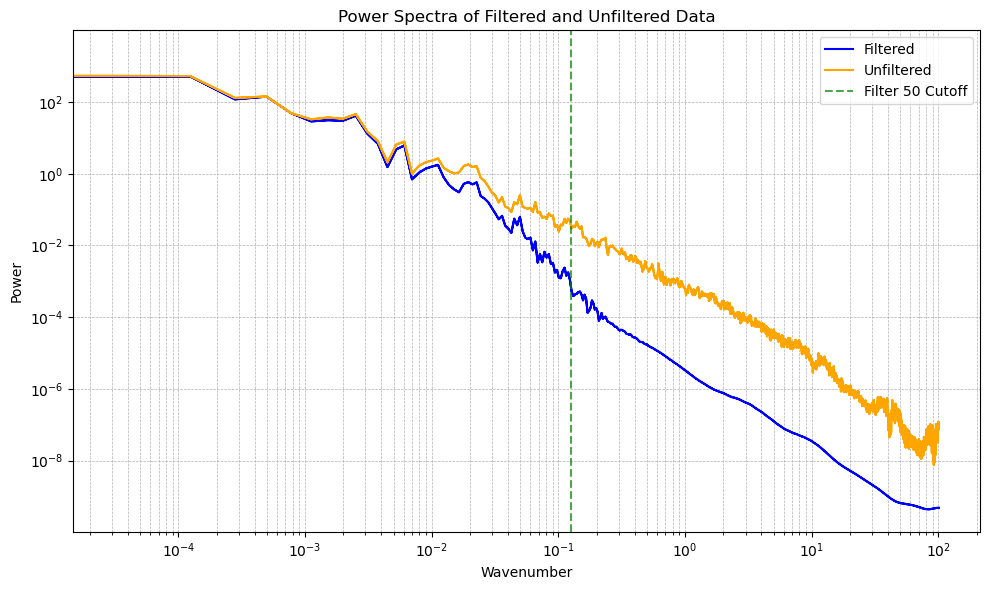

In [14]:
ds_in_snapshot = ds_in["u_relative"][0] #choose first time point
ds_out_50_snapshot = ds_out_50["u_relative"][0] #choose first time point

# Compute power spectrum for mean prediction and target
ps_unfiltered = xrft.power_spectrum(ds_in_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')
ps_filtered = xrft.power_spectrum(ds_out_50_snapshot, dim='xt_ocean', window=True).mean(dim='yt_ocean')

# Plot power spectra
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot((ps_filtered.freq_xt_ocean * 2 * np.pi) ** 2 / 9.81, ps_filtered, label='Filtered', color='blue')
ax.plot((ps_unfiltered.freq_xt_ocean * 2 * np.pi) ** 2 / 9.81, ps_unfiltered, label='Unfiltered', color='orange')

# Add filter cutoff line
ax.axvline(0.125, color='green', linestyle='--', alpha=0.7, label=f"Filter 50 Cutoff")

# Configure the plot
ax.set_title("Power Spectra of Filtered and Unfiltered Data")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Power')
ax.legend(loc='best')
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()


Why is it that our power spectra for the filtered case does not drop off here? This could be because in Julius's code, the wet mask inputted into the filter creation function is a mask that accounts for NaN values across all variables. Thus, if a given point has a NaN for "slp", but not for "u_ocean", the wet mask will still force this point to be considered land when both variables are filtered. This could be what is causing our problem, especially since the filter creation does not take into account to data to which it will later be applied.